In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

import os
for dirname, _, filenames in os.walk("/content/drive/MyDrive/tesla_used_car_sold-2022-08 (1).csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tesla_used_car_sold-2022-08 (1).csv')
data.head()

,vin,year,model,color,miles,trim,sold_price,interior,wheels,features,country,location,metro,state,currency,sold_date
0,5YJYGAEEXMF159365,2021,my,SILVER,16901,Model Y Long Range Dual Motor All-Wheel Drive,77600,PREMIUM_BLACK,TWENTY,Midnight Silver Metallic Paint;20’’ Induction ...,US,"Colma, CA",Bay Area,CA,USD,2022-08-31
1,5YJXCAE24LF264706,2020,mx,BLUE,24778,Model X Long Range Plus All-Wheel Drive,111200,WHITE,TWENTY,"Deep Blue Metallic;20"" Silver Wheels;Black and...",US,"Rockville, MD",NaN,MD,USD,2022-08-31
2,5YJSA1E25KF331229,2019,ms,WHITE,35989,Model S Long Range All-Wheel Drive,77100,WHITE,TWENTY_ONE,"Pearl White Multi-Coat;21"" Sonic Carbon Twin T...",US,"Marina Del Rey, CA",Los Angeles,CA,USD,2022-08-31
3,5YJXCAE21KF197562,2019,mx,WHITE,60508,Model X Long Range All-Wheel Drive,91000,CREAM,TWENTY,"Pearl White Multi-Coat;20"" Silver Wheels;Cream...",US,"MECHANICSBURG, PA",Philadelphia,PA,USD,2022-08-31
4,5YJXCAE23JF138317,2018,mx,GREY,42565,100D Long Range All-Wheel Drive,88400,BLACK,TWENTY,"Midnight Silver Metallic Paint;20"" Sonic Carbo...",US,"Rockville, MD",NaN,MD,USD,2022-08-31


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vin         1579 non-null   object
 1   year        1579 non-null   int64 
 2   model       1579 non-null   object
 3   color       1579 non-null   object
 4   miles       1579 non-null   int64 
 5   trim        1579 non-null   object
 6   sold_price  1579 non-null   int64 
 7   interior    1579 non-null   object
 8   wheels      1545 non-null   object
 9   features    1579 non-null   object
 10  country     1579 non-null   object
 11  location    1434 non-null   object
 12  metro       1340 non-null   object
 13  state       1564 non-null   object
 14  currency    1579 non-null   object
 15  sold_date   1579 non-null   object
dtypes: int64(3), object(13)
memory usage: 197.5+ KB


In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,miles,sold_price
year,1.000000,-0.561017,0.380431
miles,-0.561017,1.000000,-0.344680
sold_price,0.380431,-0.344680,1.000000


<ipython-input-9-49d000629dc2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


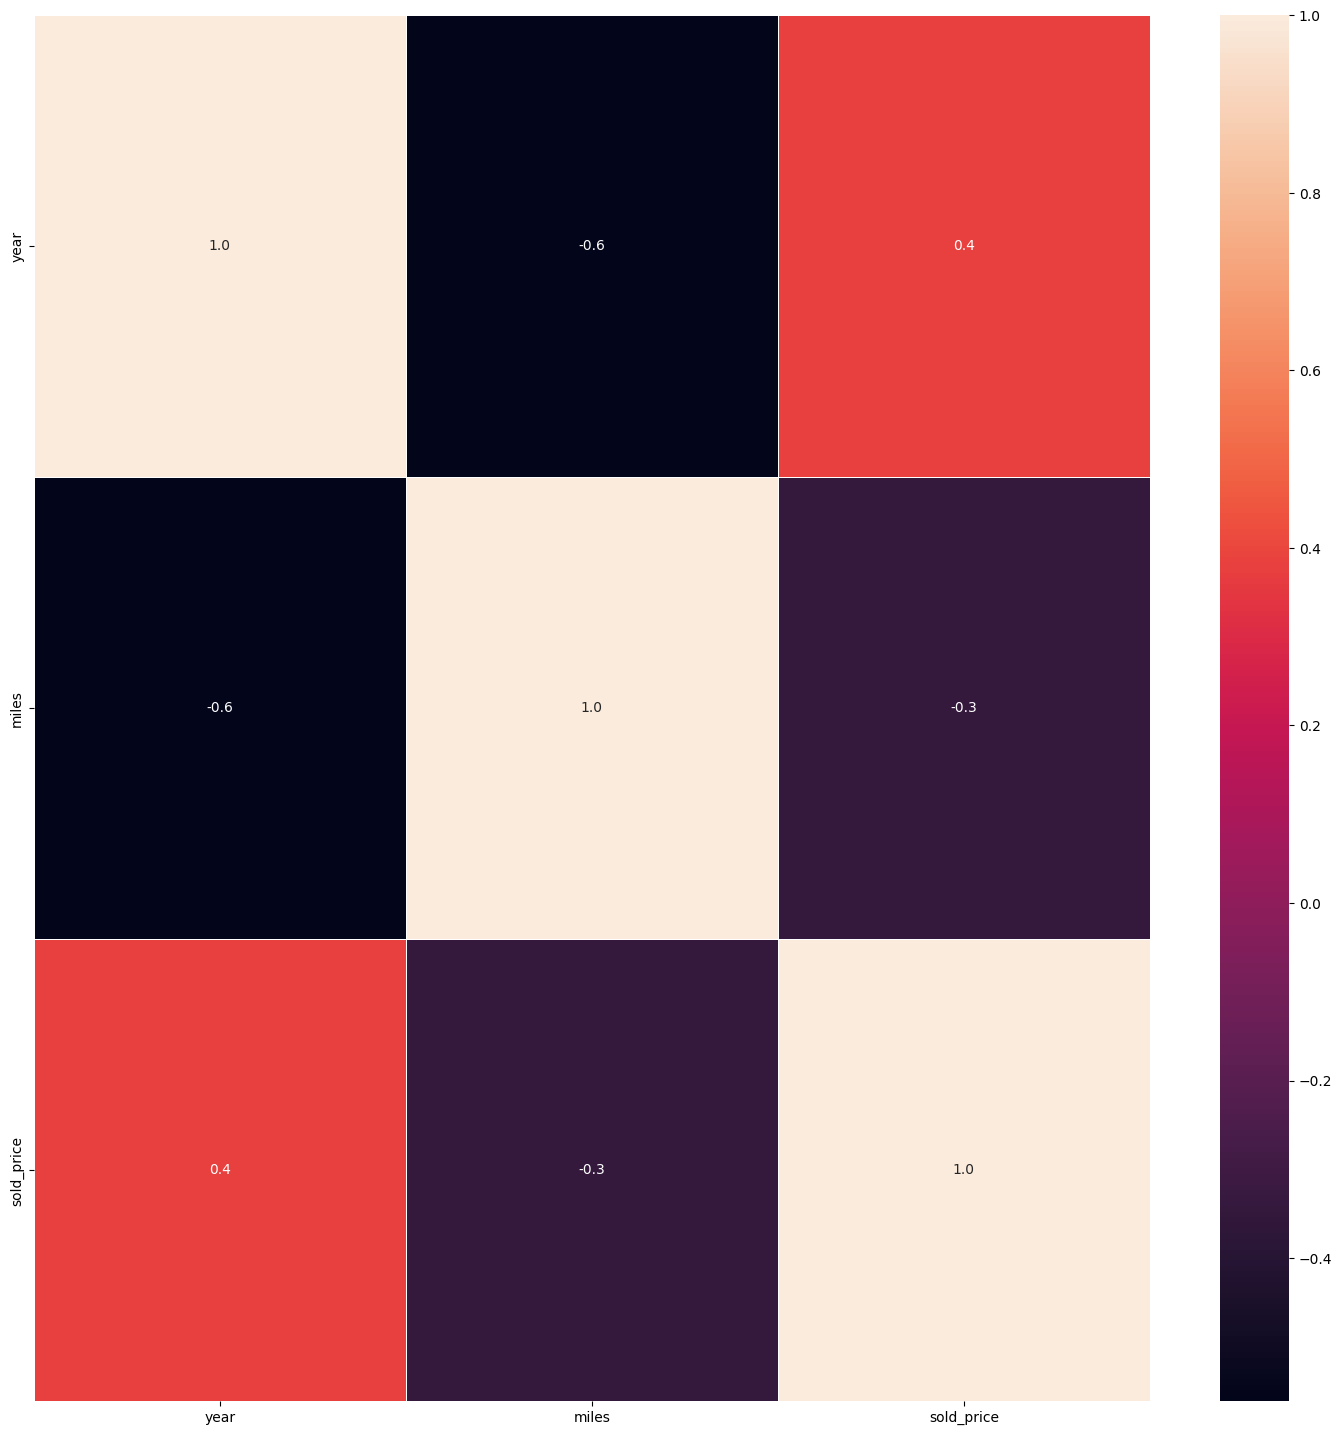

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
data.head(10)

,vin,year,model,color,miles,trim,sold_price,interior,wheels,features,country,location,metro,state,currency,sold_date
0,5YJYGAEEXMF159365,2021,my,SILVER,16901,Model Y Long Range Dual Motor All-Wheel Drive,77600,PREMIUM_BLACK,TWENTY,Midnight Silver Metallic Paint;20’’ Induction ...,US,"Colma, CA",Bay Area,CA,USD,2022-08-31
1,5YJXCAE24LF264706,2020,mx,BLUE,24778,Model X Long Range Plus All-Wheel Drive,111200,WHITE,TWENTY,"Deep Blue Metallic;20"" Silver Wheels;Black and...",US,"Rockville, MD",NaN,MD,USD,2022-08-31
2,5YJSA1E25KF331229,2019,ms,WHITE,35989,Model S Long Range All-Wheel Drive,77100,WHITE,TWENTY_ONE,"Pearl White Multi-Coat;21"" Sonic Carbon Twin T...",US,"Marina Del Rey, CA",Los Angeles,CA,USD,2022-08-31
3,5YJXCAE21KF197562,2019,mx,WHITE,60508,Model X Long Range All-Wheel Drive,91000,CREAM,TWENTY,"Pearl White Multi-Coat;20"" Silver Wheels;Cream...",US,"MECHANICSBURG, PA",Philadelphia,PA,USD,2022-08-31
4,5YJXCAE23JF138317,2018,mx,GREY,42565,100D Long Range All-Wheel Drive,88400,BLACK,TWENTY,"Midnight Silver Metallic Paint;20"" Sonic Carbo...",US,"Rockville, MD",NaN,MD,USD,2022-08-31
5,5YJ3E1EBXKF451665,2019,m3,BLACK,10879,Model 3 Long Range All-Wheel Drive,58800,PREMIUM_BLACK,EIGHTEEN,Solid Black Paint;18’’ Aero Wheels;All Black P...,US,"Devon, PA",Philadelphia,PA,USD,2022-08-31
6,5YJXCDE20KF188420,2019,mx,BLACK,45004,Model X Long Range All-Wheel Drive,86300,WHITE,TWENTY,"Solid Black;20"" Silver Wheels;Black and White ...",US,NaN,NaN,RI,USD,2022-08-31
7,5YJ3E1EA4KF394841,2019,m3,BLACK,31991,Model 3 Standard Range Plus Rear-Wheel Drive,44300,PREMIUM_BLACK,EIGHTEEN,Solid Black Paint;18’’ Aero Wheels;All Black P...,US,"Paramus, NJ",New Jersey,NJ,USD,2022-08-31
8,5YJ3E1EB4KF393181,2019,m3,WHITE,17252,Model 3 Long Range All-Wheel Drive Performance,59400,PREMIUM_BLACK,TWENTY,Pearl White Paint;20’’ Performance Wheels;All ...,US,"MECHANICSBURG, PA",Philadelphia,PA,USD,2022-08-31
9,5YJSA1E25KF306718,2019,ms,GREY,27135,100D Long Range All-Wheel Drive,86700,BLACK,TWENTY_ONE,"Midnight Silver Metallic Paint;21"" Sonic Carbo...",US,"Rockville, MD",NaN,MD,USD,2022-08-31


In [ ]:
data.columns

Index(['vin', 'year', 'model', 'color', 'miles', 'trim', 'sold_price',
       'interior', 'wheels', 'features', 'country', 'location', 'metro',
       'state', 'currency', 'sold_date'],
      dtype='object')

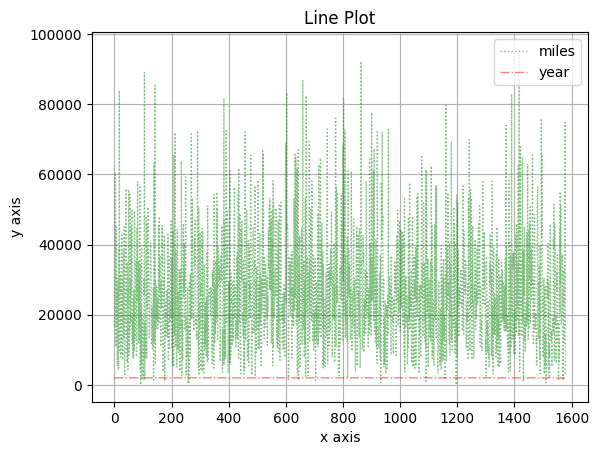

In [ ]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.miles.plot(kind = 'line', color = 'g',label = 'miles',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.year.plot(color = 'r',label = 'year',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'Year and Sold_price Scatter Plot')

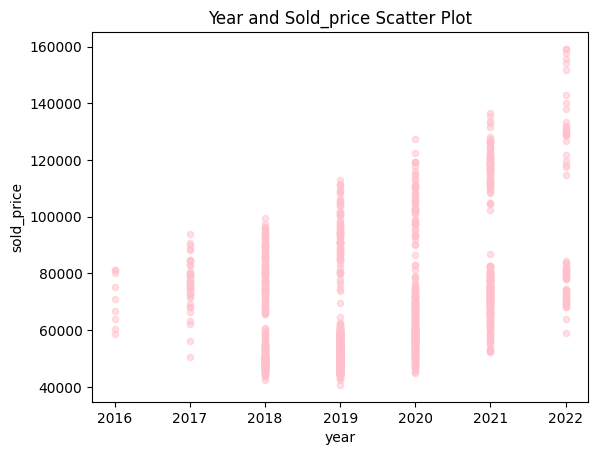

In [ ]:
# Scatter Plot
# x =year , y = sold_price
data.plot(kind='scatter', x='year', y='sold_price',alpha = 0.5,color = 'pink')
plt.xlabel('year')              # label = name of label
plt.ylabel('sold_price')
plt.title('Year and Sold_price Scatter Plot')            # title = title of plot

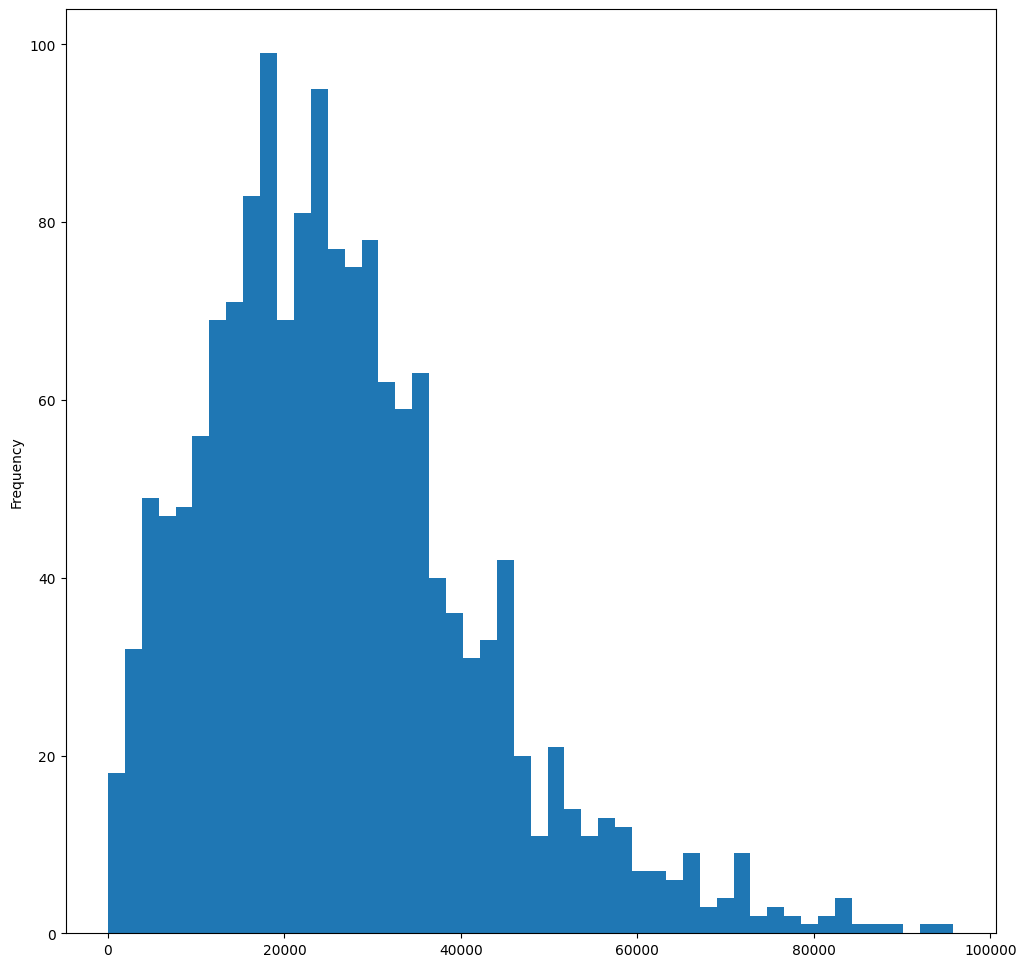

In [ ]:
# Histogram
# bins = number of bar in figure
data.miles.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

<Axes: >

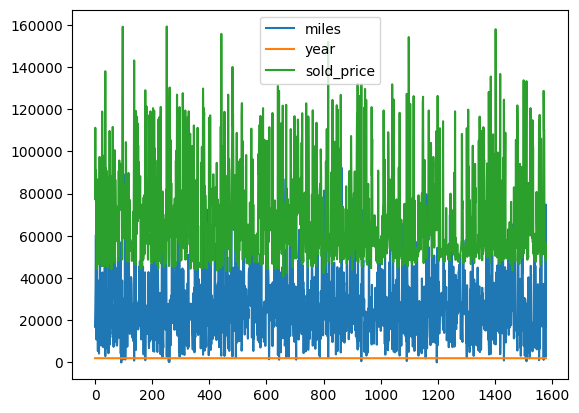

In [ ]:
# Plotting all data
data1 = data.loc[:,["miles","year","sold_price"]]
data1.plot()
# it is confusing

In [ ]:
# clf() = cleans it up again you can start a fresh
data.miles.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
series = data['model']        # data['model'] = series
print(type(series))
data_frame = data[['currency']]  # data[['currency']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 1 - Filtering Pandas data frame
x = data['year']>2020     # There are only 3 pokemons who have higher defense value than 200
data[x]

,vin,year,model,color,miles,trim,sold_price,interior,wheels,features,country,location,metro,state,currency,sold_date
0,5YJYGAEEXMF159365,2021,my,SILVER,16901,Model Y Long Range Dual Motor All-Wheel Drive,77600,PREMIUM_BLACK,TWENTY,Midnight Silver Metallic Paint;20’’ Induction ...,US,"Colma, CA",Bay Area,CA,USD,2022-08-31
22,5YJ3E1EB6MF065246,2021,m3,BLUE,7979,Model 3 Long Range All-Wheel Drive,68600,PREMIUM_BLACK,NINETEEN,Deep Blue Metallic Paint;19’’ Sport Wheels;All...,US,"LIBERTYVILLE, IL",Chicago,IL,USD,2022-08-31
23,5YJ3E1EA5MF854365,2021,m3,BLACK,17895,Model 3 Standard Range Plus Rear-Wheel Drive,52600,PREMIUM_WHITE,EIGHTEEN,Solid Black Paint;18’’ Aero Wheels;Black and W...,US,NaN,NaN,TX,USD,2022-08-31
25,5YJSA1E64MF447639,2021,ms,BLACK,9055,Model S Plaid,118900,CREAM,TWENTY_ONE,"Solid Black;21"" Arachnid Wheels;Cream Interior...",US,NaN,NaN,TX,USD,2022-08-31
29,5YJ3E1EC3NF110461,2022,m3,BLUE,7236,Model 3 Performance Dual Motor All-Wheel Drive,70300,PREMIUM_BLACK,NaN,Deep Blue Metallic Paint;20’’ Überturbine Whee...,US,"Scottsdale, AZ",Phoenix,AZ,USD,2022-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,5YJSA1E55NF470470,2022,ms,WHITE,1099,Model S Dual Motor All-Wheel Drive,114900,BLACK,NINETEEN,"Pearl White Multi-Coat;19"" Tempest Wheels;All ...",US,NaN,NaN,NaN,USD,2022-08-01
1555,5YJ3E1EB0MF862835,2021,m3,BLUE,8592,Model 3 Long Range All-Wheel Drive,67900,PREMIUM_WHITE,NINETEEN,Deep Blue Metallic Paint;19’’ Sport Wheels;Bla...,US,NaN,NaN,NaN,USD,2022-08-01
1556,5YJSA1E58MF433783,2021,ms,BLUE,12967,Model S Long Range,117300,BLACK,TWENTY_ONE,"Deep Blue Metallic;21"" Arachnid Wheels;All Bla...",US,"Littleton, CO",Denver,CO,USD,2022-08-01
1570,7SAXCDE53NF334715,2022,mx,GREY,1254,Model X Dual Motor All-Wheel Drive,128700,BLACK,NaN,Midnight Silver Metallic;22'' Turbine Wheels;A...,US,"Lathrop, CA",Bay Area,CA,USD,2022-08-01


In [ ]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['year']>2021, data['sold_price']>100000)]

,vin,year,model,color,miles,trim,sold_price,interior,wheels,features,country,location,metro,state,currency,sold_date
36,5YJSA1E66NF474570,2022,ms,WHITE,3013,Model S Plaid,138000,WHITE,NINETEEN,"Pearl White Multi-Coat;19"" Tempest Wheels;Blac...",US,NaN,NaN,TX,USD,2022-08-31
97,7SAXCBE62NF332032,2022,mx,BLACK,1998,Model X Plaid,159100,WHITE,NaN,Solid Black;22'' Turbine Wheels;Black and Whit...,US,"Marina Del Rey, CA",Los Angeles,CA,USD,2022-08-30
137,7SAXCBE5XNF336403,2022,mx,WHITE,927,Model X Dual Motor All-Wheel Drive,143100,WHITE,NaN,Pearl White Multi-Coat;22'' Turbine Wheels;Bla...,US,"Savannah, GA",Savannah,GA,USD,2022-08-29
176,5YJSA1E66NF460622,2022,ms,BLUE,1077,Model S Plaid,129000,WHITE,TWENTY_ONE,"Deep Blue Metallic;21"" Arachnid Wheels;Black a...",US,"Lathrop, CA",Bay Area,CA,USD,2022-08-28
251,7SAXCBE63NF333397,2022,mx,GREY,2820,Model X Plaid,159200,CREAM,NaN,Midnight Silver Metallic;22'' Turbine Wheels;C...,US,"Rocklin, CA",Bay Area,CA,USD,2022-08-26
260,5YJSA1E53NF479331,2022,ms,BLACK,255,Model S Dual Motor All-Wheel Drive,117500,BLACK,NINETEEN,"Solid Black;19"" Tempest Wheels;All Black Premi...",US,"Rockville, MD",NaN,MD,USD,2022-08-26
261,5YJSA1E67NF462945,2022,ms,BLACK,4224,Model S Plaid,130300,BLACK,TWENTY_ONE,"Solid Black;21"" Arachnid Wheels;All Black Prem...",US,"Tempe, AZ",NaN,AZ,USD,2022-08-26
378,5YJSA1E6XNF472742,2022,ms,GREY,3657,Model S Plaid,129800,CREAM,TWENTY_ONE,"Midnight Silver Metallic;21"" Arachnid Wheels;C...",US,"Costa Mesa, CA",Orange County,CA,USD,2022-08-24
382,5YJSA1E55NF464586,2022,ms,WHITE,9035,Model S Dual Motor All-Wheel Drive,118400,BLACK,TWENTY_ONE,"Pearl White Multi-Coat;21"" Arachnid Wheels;All...",US,"Irvine, CA",Los Angeles,CA,USD,2022-08-24
442,7SAXCBE61NF336797,2022,mx,WHITE,3211,Model X Plaid,155700,BLACK,NaN,Pearl White Multi-Coat;22'' Turbine Wheels;All...,US,"Portland, OR",Portland,OR,USD,2022-08-23


In [ ]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,vin,year,model,color,miles,trim,sold_price,interior,wheels,features,country,location,metro,state,currency,sold_date
0,5YJYGAEEXMF159365,2021,my,SILVER,16901,Model Y Long Range Dual Motor All-Wheel Drive,77600,PREMIUM_BLACK,TWENTY,Midnight Silver Metallic Paint;20’’ Induction ...,US,"Colma, CA",Bay Area,CA,USD,2022-08-31
1,5YJXCAE24LF264706,2020,mx,BLUE,24778,Model X Long Range Plus All-Wheel Drive,111200,WHITE,TWENTY,"Deep Blue Metallic;20"" Silver Wheels;Black and...",US,"Rockville, MD",NaN,MD,USD,2022-08-31
2,5YJSA1E25KF331229,2019,ms,WHITE,35989,Model S Long Range All-Wheel Drive,77100,WHITE,TWENTY_ONE,"Pearl White Multi-Coat;21"" Sonic Carbon Twin T...",US,"Marina Del Rey, CA",Los Angeles,CA,USD,2022-08-31
3,5YJXCAE21KF197562,2019,mx,WHITE,60508,Model X Long Range All-Wheel Drive,91000,CREAM,TWENTY,"Pearl White Multi-Coat;20"" Silver Wheels;Cream...",US,"MECHANICSBURG, PA",Philadelphia,PA,USD,2022-08-31
4,5YJXCAE23JF138317,2018,mx,GREY,42565,100D Long Range All-Wheel Drive,88400,BLACK,TWENTY,"Midnight Silver Metallic Paint;20"" Sonic Carbo...",US,"Rockville, MD",NaN,MD,USD,2022-08-31
5,5YJ3E1EA2KF441381,2019,m3,BLUE,11981,Model 3 Standard Range Plus Rear-Wheel Drive,54500,PREMIUM_BLACK,NINETEEN,Deep Blue Metallic Paint;19’’ Sport Wheels;All...,US,"Portland, OR",Portland,OR,USD,2022-08-01
6,5YJ3E1EA7JF101982,2018,m3,GRAY,17231,Model 3 Long Range Rear-Wheel Drive,54800,PREMIUM_BLACK,EIGHTEEN,Midnight Silver Metallic Paint;18’’ Aero Wheel...,US,"Colma, CA",Bay Area,CA,USD,2022-08-01
7,5YJ3E1EA2KF396099,2019,m3,BLACK,28416,Model 3 Standard Range Plus Rear-Wheel Drive,49800,PREMIUM_BLACK,EIGHTEEN,Solid Black Paint;18’’ Aero Wheels;All Black P...,US,"Lathrop, CA",Bay Area,CA,USD,2022-08-01
8,5YJ3E1EA4JF025301,2018,m3,WHITE,74865,Model 3 Long Range Rear-Wheel Drive,48400,PREMIUM_BLACK,NINETEEN,Pearl White Paint;19’’ Sport Wheels;All Black ...,US,"Colma, CA",Bay Area,CA,USD,2022-08-01
9,5YJ3E1EB9KF391605,2019,m3,GRAY,2849,Model 3 Long Range All-Wheel Drive,56500,PREMIUM_WHITE,EIGHTEEN,Midnight Silver Metallic Paint;18’’ Aero Wheel...,US,"FIFE, WA",NaN,WA,USD,2022-08-01


In [ ]:
data1 = data['miles'].head()
data2= data['year'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,miles,year
0,16901,2021
1,24778,2020
2,35989,2019
3,60508,2019
4,42565,2018


In [ ]:
data.dtypes

vin           object
year           int64
model         object
color         object
miles          int64
trim          object
sold_price     int64
interior      object
wheels        object
features      object
country       object
location      object
metro         object
state         object
currency      object
sold_date     object
dtype: object

**DICTIONARY:**

In [ ]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [ ]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [ ]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['miles']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  miles    16901
Name: 0, dtype: int64


** PYTHON DATA SCIENCE TOOLBOX:**

In [ ]:
#USER DEFINED FUNCTION:
#What do we need to know about functions:

#docstrings: documentation for functions. Example:
#for f():
"""This is docstring for documentation of function f"""
#tuple: sequence of immutable python objects.
#cant modify values
#tuple uses paranthesis like tuble = (1,2,3)
#unpack tuple into several variables like a,b,c = tuple

'This is docstring for documentation of function f'

In [ ]:
# example of what we learn above
def tuple_ex():
    """ return defined t tuple"""
    t = (1,2,3)
    return t
a,b,c = tuple_ex()
print(a,b,c)

1 2 3


In [ ]:
# guess prints what
x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

2
3


In [ ]:
# What if there is no local scope
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x
# First local scope searched, then global scope searched, if two of them cannot be found lastly built in scope searched.

10


In [ ]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

In [ ]:
#nested function
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())

25


DEFAULT and FLEXIBLE ARGUMENTS

Default argument example:

def f(a, b=1):

 """ b = 1 is default argument"""

Flexible argument example:

def f(*args):

 """ *args can be one or more"""

def f(** kwargs)

 """ **kwargs is a dictionary"""

In [ ]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(5))
# what if we want to change default arguments
print(f(5,4,3))

8
12


In [ ]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

1

1
2
3
4
country   spain
capital   madrid
population   123456


In [ ]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


In [ ]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


In [ ]:
# iteration example
name = "kavitha"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

k
a v i t h a


In [ ]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [ ]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


In [ ]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1 ]
print(num2)

[2, 3, 4]


In [ ]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]
